<a href="https://colab.research.google.com/github/kahramankaya/VeriBilimiKucukProje/blob/main/1-A_B_test-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B Testing means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently. A/B testing is one of the valuable concepts that every Data Science professional should know. In this article, I will take you through the task of A/B Testing using Python.

A/B Testing
In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

For the task of A/B testing using Python, we need to have a dataset about two different marketing strategies for the same goal. I found a dataset that will help us perform A/B testing. You can download it from here.

In the section below, I will take you through the task of A/B Testing using Python.

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
data1=pd.read_csv("/content/test_group.csv",sep=";")
data2=pd.read_csv("/content/control_group.csv",sep=";")
print(data1)
print(data2)

    Campaign Name        Date  Spend [USD]  # of Impressions   Reach  \
0   Test Campaign   1.08.2019         3008             39550   35820   
1   Test Campaign   2.08.2019         2542            100719   91236   
2   Test Campaign   3.08.2019         2365             70263   45198   
3   Test Campaign   4.08.2019         2710             78451   25937   
4   Test Campaign   5.08.2019         2297            114295   95138   
5   Test Campaign   6.08.2019         2458             42684   31489   
6   Test Campaign   7.08.2019         2838             53986   42148   
7   Test Campaign   8.08.2019         2916             33669   20149   
8   Test Campaign   9.08.2019         2652             45511   31598   
9   Test Campaign  10.08.2019         2790             95054   79632   
10  Test Campaign  11.08.2019         2420             83633   71286   
11  Test Campaign  12.08.2019         2831            124591   10598   
12  Test Campaign  13.08.2019         1972             65827   4

In [5]:
#let's have a look at both datasets:
print(data1.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  


In [6]:
print(data2.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [7]:
#Data Preparation
data1.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]
data2.columns=["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]                        

In [8]:
#now let's see if our datasets have null values or not:
print(data1.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [9]:
#this dataset has some null values. so 
print(data2.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [10]:
#lets fill in these missing values by the mean value of each column.

data2["Number of Impressions"].fillna(value=data2["Number of Impressions"].mean(), 
                                             inplace=True)
data2["Reach"].fillna(value=data2["Reach"].mean(), 
                                             inplace=True)
data2["Website Clicks"].fillna(value=data2["Website Clicks"].mean(), 
                                             inplace=True)
data2["Searches Received"].fillna(value=data2["Searches Received"].mean(), 
                                             inplace=True)
data2["Content Viewed"].fillna(value=data2["Content Viewed"].mean(), 
                                             inplace=True)
data2["Added to Cart"].fillna(value=data2["Added to Cart"].mean(), 
                                             inplace=True)
data2["Purchases"].fillna(value=data2["Purchases"].mean(), 
                                             inplace=True)

In [11]:
# I will create new dataset by merging both datasets:
new_data=data1.merge(data2,how="outer").sort_values(["Date"])
print(new_data)

       Campaign Name        Date  Amount Spent  Number of Impressions  \
0      Test Campaign   1.08.2019          3008           39550.000000   
30  Control Campaign   1.08.2019          2280           82702.000000   
39  Control Campaign  10.08.2019          2149          117624.000000   
9      Test Campaign  10.08.2019          2790           95054.000000   
40  Control Campaign  11.08.2019          2490          115247.000000   
10     Test Campaign  11.08.2019          2420           83633.000000   
41  Control Campaign  12.08.2019          2319          116639.000000   
11     Test Campaign  12.08.2019          2831          124591.000000   
42  Control Campaign  13.08.2019          2697           82847.000000   
12     Test Campaign  13.08.2019          1972           65827.000000   
43  Control Campaign  14.08.2019          1875          145248.000000   
13     Test Campaign  14.08.2019          2537           56304.000000   
44  Control Campaign  15.08.2019          2774     

/usr/local/lib/python3.9/dist-packages/pandas/core/reshape/merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [12]:
print(new_data.head(10))

       Campaign Name        Date  Amount Spent  Number of Impressions  \
0      Test Campaign   1.08.2019          3008                39550.0   
30  Control Campaign   1.08.2019          2280                82702.0   
39  Control Campaign  10.08.2019          2149               117624.0   
9      Test Campaign  10.08.2019          2790                95054.0   
40  Control Campaign  11.08.2019          2490               115247.0   
10     Test Campaign  11.08.2019          2420                83633.0   
41  Control Campaign  12.08.2019          2319               116639.0   
11     Test Campaign  12.08.2019          2831               124591.0   
42  Control Campaign  13.08.2019          2697                82847.0   
12     Test Campaign  13.08.2019          1972                65827.0   

       Reach  Website Clicks  Searches Received  Content Viewed  \
0    35820.0          3038.0             1946.0          1069.0   
30   56930.0          7016.0             2290.0          2159.

In [13]:
#Before moving forward, let’s have a look if the dataset has an equal number of samples about both campaigns:
new_data["Campaign Name"].value_counts()

Test Campaign       30
Control Campaign    30
Name: Campaign Name, dtype: int64

In [14]:
#The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.
fıgure=px.scatter(data_frame=new_data,
                  y="Number of Impressions",
                  x="Amount Spent",
                  size="Amount Spent",
                  color= "Campaign Name",
                  trendline="ols"

                  )

fıgure.show()

the control campaign resulted im more impressions.


In [15]:
#now let's have look at the number of searches on the website both campaign.
label=["total searches from test campaign",
       "total searches from control campaign"]
count=[sum(data1["Searches Received"]),
       sum(data2["Searches Received"])]
color=["blue","yellow"]
fig=go.Figure(data=go.Pie(labels=label,values=count))

fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=color, 
                              line=dict(color='RED', width=5)))

fig.show()



In [16]:
label=["Website Clicks from test campaign",
       "Website Clicks from control campaign"]

count=[
       sum(data1["Website Clicks"]),
       sum(data2["Website Clicks"])
       ]

color=["black","yellow"]
fig=go.Figure(data=go.Pie(labels=label,values=count))
fig.update_traces(hoverinfo="label+percent",
                  textinfo="value",
                  textfont_size=30,
                  marker=dict(colors=color,line=dict(color="red",width=15))       
                  )
fig.show()

In [17]:
label=["Content Viewed from test campaign",
       "Content Viewed from control campaign"]

count=[
       sum(data1["Content Viewed"]),
       sum(data2["Content Viewed"])
       ]

color=["green","yellow"]

fig=go.Figure(data=go.Pie(labels=label,values=count))
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo="label+percent",
                  textinfo="value",
                  textfont_size=30,
                  marker=dict(colors=color,line=dict(color="green",width=5))
                  
                  )
fig.show()

In [18]:
label=["Products Added to Cart from control campaign",
       "Products Added to Cart from test campaign"]

count=[
       sum(data1["Added to Cart"]),
       sum(data2["Added to Cart"])
       ]

color=["black","yellow"]
fig=go.Figure(data=go.Pie(labels=label,values=count))
fig.update_traces(hoverinfo="label+percent",
                  textinfo="value",
                  textfont_size=30,
                  marker=dict(colors=color,line=dict(color="green",width=5))
                  
                  )
fig.show()

In [19]:
figure = px.scatter(data_frame = new_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

In [20]:
#kontrol kampanyası test istatiğine göre daha avantajlıdır.

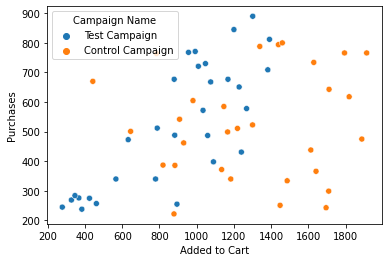

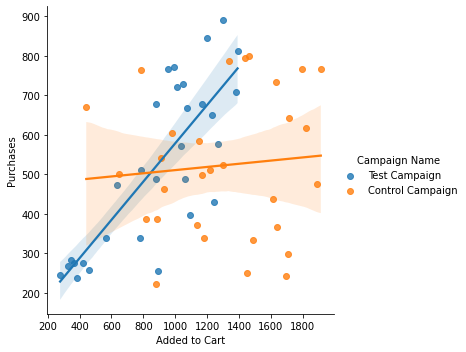

In [26]:
#yukardaki grafigi ek olarak seaborn ıle cızdım.
import seaborn as sns 
sns.scatterplot(x="Added to Cart",y="Purchases",hue="Campaign Name",data=new_data)
sns.lmplot(x="Added to Cart",y="Purchases",hue="Campaign Name",data=new_data)

<Axes: xlabel='Campaign Name', ylabel='Added to Cart'>

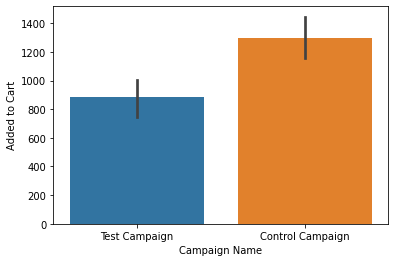

In [23]:
#dairesellerden aldıgın bılgıyı barplot ile alabilirsin bu şekilde. tabi onun kadar detaylı kesin değil.
sns.barplot(y="Added to Cart",x=new_data['Campaign Name'],data=new_data)